## Introduction to Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
plt.style.available
plt.style.use('classic')

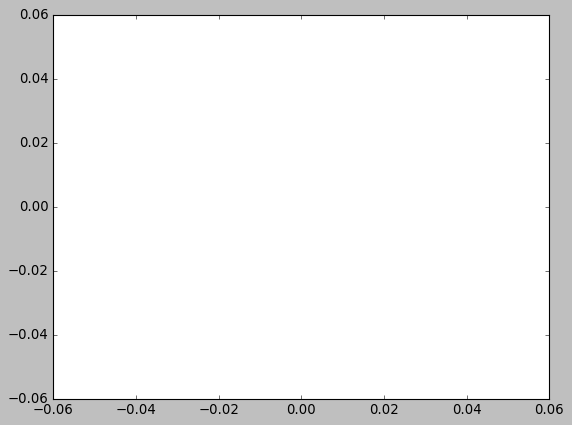

In [23]:
plt.plot();

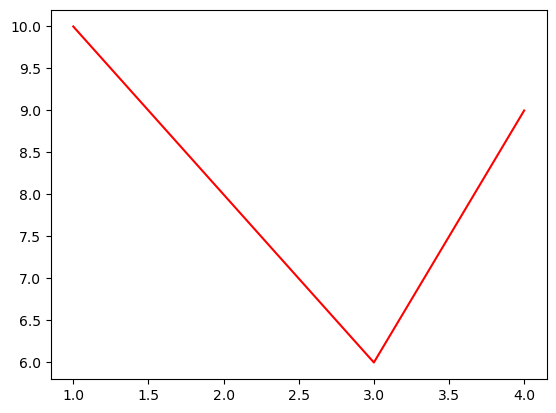

In [10]:
x = [1,2,3,4]
y = [10,8,6,9]
plt.plot(x,y, color="red"); # put ';' to remove [<matplotlib.lines.Line2D at 0x19decbe8390>]

### Pyplot API vs Object-Oriented(OO) API 
* Pyplot API -> Quickly
* OO API -> Advanced

#### Pyplot API 

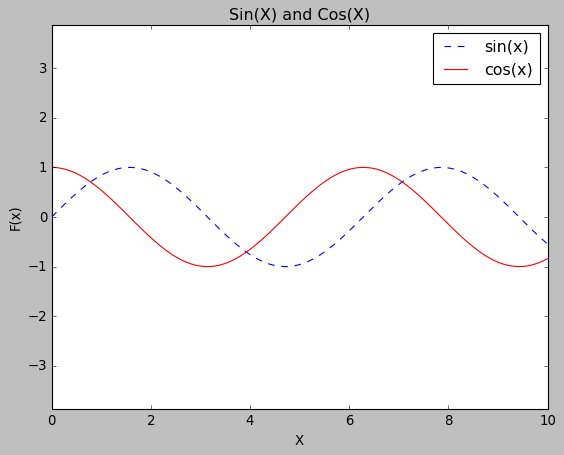

In [40]:
x = np.linspace(0,10,1000)
plt.plot(x, np.sin(x), linestyle="dashed", label="sin(x)");
plt.plot(x, np.cos(x), color="red", label="cos(x)");

plt.title("Sin(X) and Cos(X)")
plt.xlabel("X")
plt.ylabel("F(x)")

# plt.xlim([0,4])
# plt.ylim([-0.7, 0.6])
# plt.axis([0, 4, -0.7, 0.6])
plt.axis("equal")

plt.legend();

#### Object-Oriented(OO) API

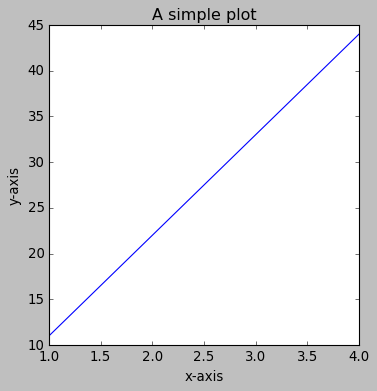

In [42]:
#1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

#2. Setup plot
fig, ax = plt.subplots(figsize=(5,5))

#3. Plot the data
ax.plot(x, y)

ax.set(title="A simple plot", xlabel="x-axis", ylabel="y-axis");

## 2.Most common types of Matplotlib plots
* line
* scatter
* bar
* hist
* subplots()

### Line

In [43]:
# Create an array
x = np.linspace(0,10,100)
x[:5]

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

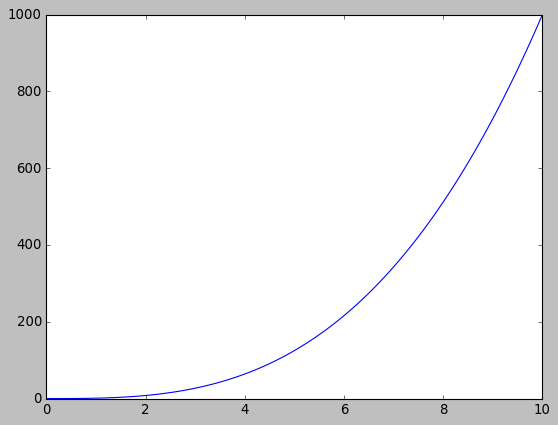

In [44]:
## OO API plot a line chart

fig, ax = plt.subplots()
ax.plot(x, x**3);

### Scatter

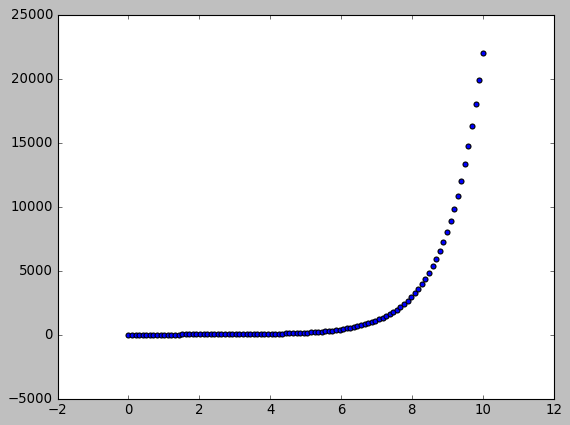

In [46]:
# Pyplot API
plt.scatter(x, np.exp(x)); # y = e^x

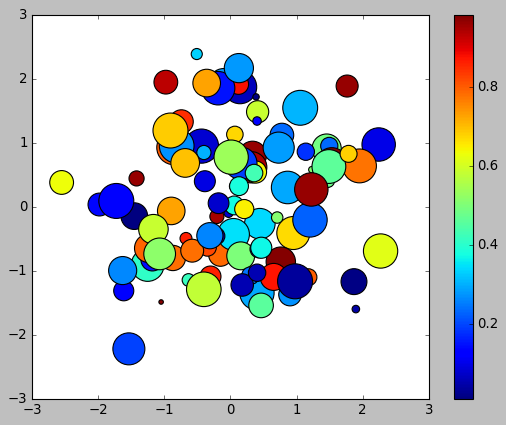

In [50]:
## OO API

# Prepare New Data
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000*rng.rand(100)

fig, ax = plt.subplots()
img1 = ax.scatter(x,y,s=sizes,c=colors);

fig.colorbar(img1);

### 3.Bar
* Vertical
* Horizontal

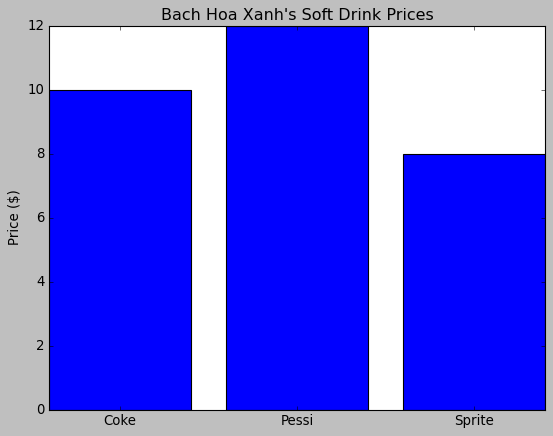

In [52]:
# Prepare Data from a Python dictionary
soft_drink_prices = {"Coke": 10, "Pessi": 12,"Sprite": 8}

fig, ax = plt.subplots()
ax.bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax.set(title="Bach Hoa Xanh's Soft Drink Prices", ylabel="Price ($)");

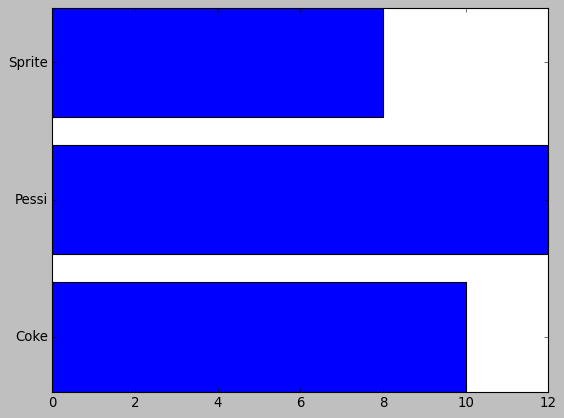

In [54]:
fig, ax = plt.subplots()
ax.barh(list(soft_drink_prices.keys()), list(soft_drink_prices.values()));

### 4.Histogram

In [61]:
# Prepare data
np.random.seed(42)
student_height = np.random.normal(170, 10, 250)
student_height[0:10], len(student_height)

(array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
        167.65846625, 167.65863043, 185.79212816, 177.67434729,
        165.30525614, 175.42560044]),
 250)

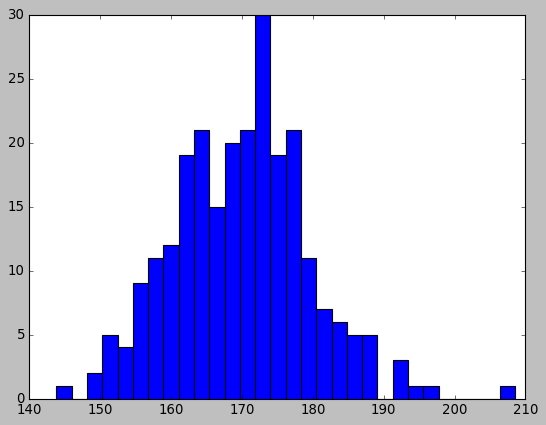

In [63]:
# pyplot API
plt.hist(student_height, bins=30);

### Subplots
* Multiple plots on one figure: https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html


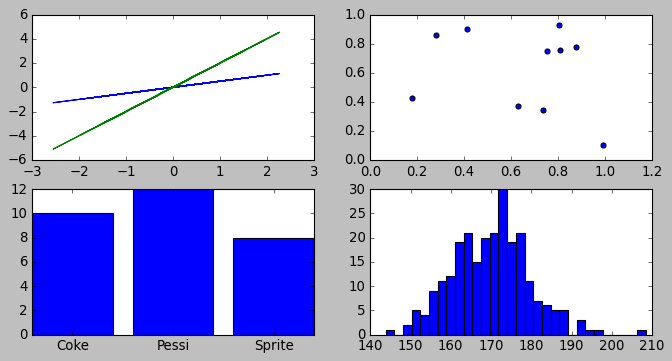

In [76]:
# Option 1:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
# Plot data to each axis 
ax1.plot(x,x/2);
ax1.plot(x,x*2);

ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax4.hist(student_height, bins=30);

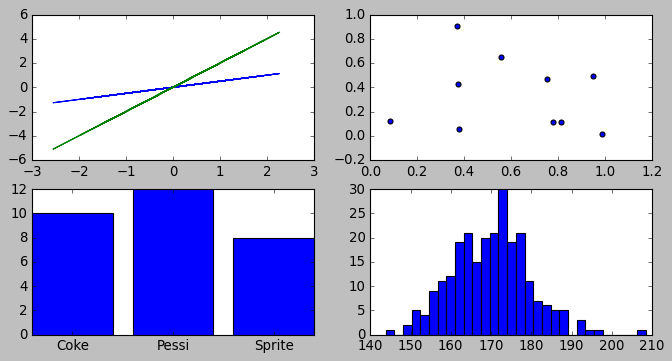

In [81]:
# Optione 2:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot data to each axis 
ax[0][0].plot(x,x/2);
ax[0][0].plot(x,x*2);

ax[0][1].scatter(np.random.random(10),np.random.random(10));
ax[1][0].bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax[1][1].hist(student_height, bins=30);

### Project: Data Visualization - California Cities

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


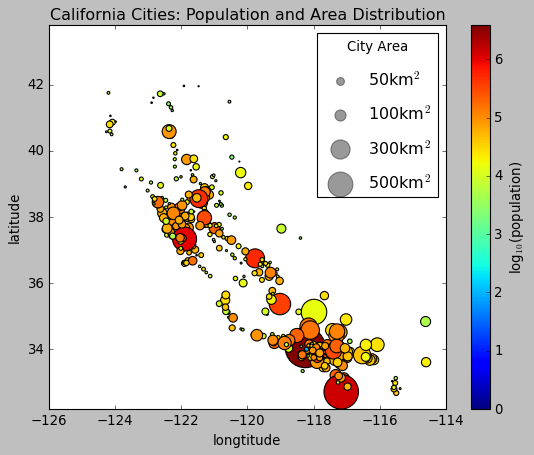

In [113]:
# Extract Latd = Vĩ độ and Longd = Kinh độ

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Plot using Pyplot API
plt.scatter(lon,lat, c=np.log10(population), s=area);
plt.axis('equal');
plt.xlabel('longtitude')
plt.ylabel('latitude');
plt.colorbar(label='log$_{10}$(population)');

# Create a legend for cities's sizes
area_range = [50,100,300,500]
for area in area_range:
    plt.scatter([],[], s=area, c='k', alpha=0.4, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, labelspacing=1, title='City Area')

plt.title('California Cities: Population and Area Distribution');